In [13]:
import pandas as pd
import numpy  as np
ser1 = pd.Series(np.arange(4)*10)
ser1

0     0
1    10
2    20
3    30
dtype: int32

In [14]:
import pandas as pd
import numpy  as np
index=['a','b','c','d']
ser2 = pd.Series(np.arange(4)*10, index)
ser2

a     0
b    10
c    20
d    30
dtype: int32

In [17]:
ser2['b':'c'] # 숫자는 끝자리가 안 들어가는데, 문자열은 끝까지 들어감

b    10
c    20
dtype: int32

In [18]:
ser2['b':'d']

b    10
c    20
d    30
dtype: int32

In [21]:
ser2[1:3]

b    10
c    20
dtype: int32

In [23]:
ser2[1:4]

b    10
c    20
d    30
dtype: int32

In [31]:
data = np.arange(16).reshape((4,4))
index = ["Ohio", 'Colorado', 'Utah', "New York"]
columns = ['One', "Two", 'Three', "Four"]
df1 = pd.DataFrame(data, index, columns)
df1

,One,Two,Three,Four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [32]:
df1.Four

Ohio         3
Colorado     7
Utah        11
New York    15
Name: Four, dtype: int32

In [35]:
df1[['Two', 'Four']] # 대괄호 두 개

,Two,Four
Ohio,1,3
Colorado,5,7
Utah,9,11
New York,13,15


In [37]:
df1[df1['Three']>5]

,One,Two,Three,Four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [ ]:
#loc iloc 색인방법

In [39]:
df1.loc['Colorado', ['Two', 'Three']] # 이름으로 검색

Two      5
Three    6
Name: Colorado, dtype: int32

In [41]:
df1.iloc[2, [3,0,1]] # 정수색인

Four    11
One      8
Two      9
Name: Utah, dtype: int32

In [42]:
df1.iloc[[1,2], [1,2]]

,Two,Three
Colorado,5,6
Utah,9,10


In [44]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a','c','d','e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a','c','e','f','g'])

In [48]:
s1 + s2 # NaA = 숫자 + 빈값

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [56]:
pd1 = pd.DataFrame(np.arange(12).reshape((3,4)), columns = ['a','b','c','d'])
pd2 = pd.DataFrame(np.arange(20).reshape((4,5)), columns = ['a','b','c','d','e'])
print(pd1)
print(pd2)

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   b   c   d   e
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19


In [57]:
pd1 + pd2 

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [60]:
pd2.loc[1, 'b'] = np.nan #pd2의 1행 b열에 nan 처리
pd2

,a,b,c,d,e
0,0,1.0,2,3,4
1,5,NaN,7,8,9
2,10,11.0,12,13,14
3,15,16.0,17,18,19


In [61]:
pd1 + pd2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [62]:
pd1.add(pd2)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [63]:
pd1.add(pd2, fill_value=0) #pd2의 NaN 값을 전부 0으로 치환

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [67]:
frame = pd.DataFrame(np.random.randn(4,3),
                     columns = ['b','d','e'],
                     index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,-0.520711,-2.135639,-1.538019
Ohio,0.145790,-0.339063,1.181673
Texas,1.244848,-1.618004,-0.874387
Oregon,0.288701,1.331481,0.063646


In [68]:
np.abs(frame) # 절대값처리

,b,d,e
Utah,0.520711,2.135639,1.538019
Ohio,0.145790,0.339063,1.181673
Texas,1.244848,1.618004,0.874387
Oregon,0.288701,1.331481,0.063646


AttributeError: 'Series' object has no attribute 'xmas'

In [73]:
frame.apply(lambda x: x.max()-x.min())

b    1.765559
d    3.467120
e    2.719692
dtype: float64

In [74]:
frame.apply(lambda x: x.max()-x.min(),
           axis='columns')

Utah      1.614928
Ohio      1.520737
Texas     2.862852
Oregon    1.267836
dtype: float64

In [76]:
def f(x):
    data = [x.min(), x.max()]
    index = ['min', 'max']
    return pd.Series(data, index)

frame.apply(f)

,b,d,e
min,-0.520711,-2.135639,-1.538019
max,1.244848,1.331481,1.181673


In [77]:
format = lambda x: '%.2f' % x #x를 받아서 넣되, 소숫점 두번째 자리까지 출력하라
frame.applymap(format)

,b,d,e
Utah,-0.52,-2.14,-1.54
Ohio,0.15,-0.34,1.18
Texas,1.24,-1.62,-0.87
Oregon,0.29,1.33,0.06


In [81]:
df3 = pd.DataFrame(np.arange(8).reshape((2,4)),
                  index = ['three', 'one'],
                  columns = ['d','a','b','c'])

In [82]:
df3.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [87]:
df3.sort_index(axis=1, ascending=True)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [84]:
df3.sort_index(axis = 1 )

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [89]:
df3.sort_index(axis = 0, ascending=False)

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [91]:
s4 = pd.Series([4,7,-3,2])
s4.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [92]:
s5 = pd.Series([7,-5,7,4,2,0,4])
s5.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [94]:
s5 = pd.Series([7,-5,7,4,2,0,4])
s5.rank(ascending=False, method='max') #평균내지말고 그냥 보여줘

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [104]:
s6 = pd.Series(range(5), index = ['kim1','lee1','kim2','park1','lee2'])

In [101]:
s6.index.is_unique

True

In [103]:
s6['kim']

KeyError: 'kim'

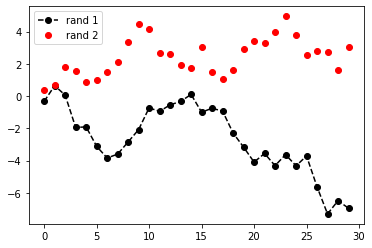

In [109]:
import matplotlib.pyplot as plt
plt.plot(np.random.randn(30).cumsum(), 'ko--', label = 'rand 1')
plt.plot(np.random.randn(30).cumsum(), 'ro', label = 'rand 2')
plt.legend(loc='best') #범례

In [113]:
ticks = ax.set_xticks([0, 250, 750, 1000])
labels = ax.set_xtickslabels(['one', 'two', 'three', 'four', 'five'],
                             rotation = 30, fontsize='small')

NameError: name 'ax' is not defined

AttributeError: 'AxesSubplot' object has no attribute 'set_xtickslabels'

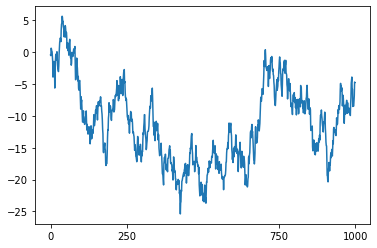

In [118]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
# ticks = ax.set_xticks([0, 250, 750, 1000]) #tick 눈금
labels = ax.set_xtickslabels(['one', 'two', 'three', 'four'],
                             rotation = 30, fontsize='small')

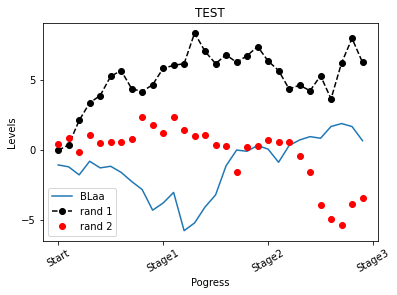

In [139]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(30).cumsum(), label = "BLaa")
plt.plot(np.random.randn(30).cumsum(), 'ko--', label = 'rand 1')
plt.plot(np.random.randn(30).cumsum(), 'ro', label = 'rand 2')
ax.set_xticks([0, 10, 20, 30])
ax.set_xticklabels(["Start", "Stage1", "Stage2", "Stage3"], rotation = 30)
ax.set_yticks([-5, 0, 5])
ax.set_xlabel("Pogress")
ax.set_ylabel("Levels", rotation = 90)
ax.set_title("TEST")
plt.legend(loc='best')
plt.show()

In [143]:
data1 = np.random.randn(30).cumsum()
data2 = np.random.randn(30).cumsum()
data3 = np.random.randn(30).cumsum()

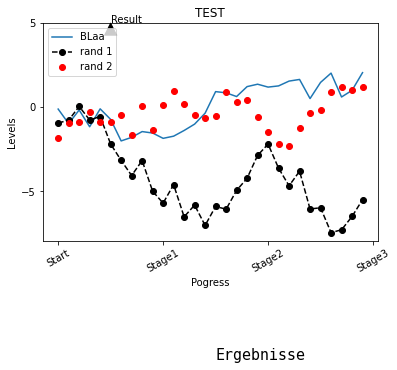

In [164]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data1, label = "BLaa")
plt.plot(data2, 'ko--', label = 'rand 1')
plt.plot(data3, 'ro', label = 'rand 2')
ax.set_xticks([0, 10, 20, 30])
ax.set_xticklabels(["Start", "Stage1", "Stage2", "Stage3"], rotation = 30)
ax.set_yticks([-5, 0, 5])
ax.set_xlabel("Pogress")
ax.set_ylabel("Levels", rotation = 90)
ax.set_title("TEST")
ax.text(15, -15, 'Ergebnisse', family = 'monospace', fontsize=15)
#            어떤 글자를 적을꺼냐 어디를 가리킬꺼냐 텍스트는 어디에 붙일껀데
ax.annotate('Result',
            xy=(5, 5), xytext=(5, 5), 
            arrowprops=dict(facecolor='black'))
plt.legend(loc='best')
plt.show()

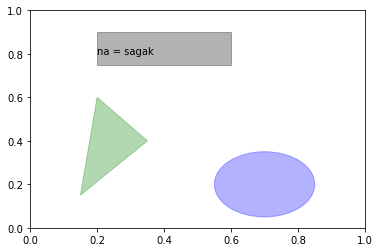

In [173]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#                                 너비  높이
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.3)

ax.text(0.2, 0.8, "na = sagak")


ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

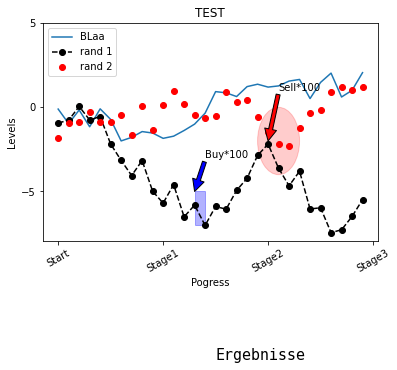

In [229]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(data1, label = "BLaa")
plt.plot(data2, 'ko--', label = 'rand 1')
plt.plot(data3, 'ro', label = 'rand 2')
ax.set_xticks([0, 10, 20, 30])
ax.set_xticklabels(["Start", "Stage1", "Stage2", "Stage3"], rotation = 30)
ax.set_yticks([-5, 0, 5])
ax.set_xlabel("Pogress")
ax.set_ylabel("Levels", rotation = 90)
ax.set_title("TEST")
ax.text(15, -15, 'Ergebnisse', family = 'monospace', fontsize=15)
#            어떤 글자를 적을꺼냐 어디를 가리킬꺼냐 텍스트는 어디에 붙일껀데


plt.legend(loc='best')

rect = plt.Rectangle((13, -5), 1, -2, color='b', alpha=0.3)
ax.annotate('Buy*100',
            xy=(13, -5), xytext=(14, -3), 
            arrowprops=dict(facecolor='b'))

circ = plt.Circle((21, -2), 2, color='r', alpha=0.2)
ax.annotate('Sell*100',
            xy=(20, -2), xytext=(21, 1), 
            arrowprops=dict(facecolor='r'))
ax.add_patch(rect)
ax.add_patch(circ)
plt.show()